In [1]:
import os
print(os.listdir("data"))

['train_target.npy', 'test_data.npy', 'train_data.npy', 'test_target.npy']


In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


Datasets 불러오기

In [6]:
# 파일 경로
data_folder = "data"  # gdown으로 다운로드된 데이터 폴더 경로
test_data_path = f"{data_folder}/test_data.npy"
test_target_path = f"{data_folder}/test_target.npy"
train_data_path = f"{data_folder}/train_data.npy"
train_target_path = f"{data_folder}/train_target.npy"

# 데이터 로드
test_data = np.load(test_data_path)
test_target = np.load(test_target_path)
train_data = np.load(train_data_path)
train_target = np.load(train_target_path)

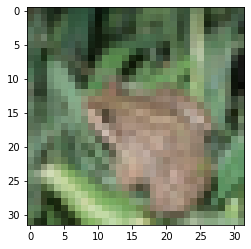

In [7]:
plt.imshow(test_data[4])

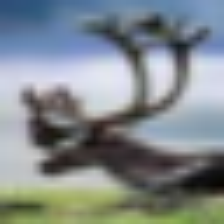

In [32]:
from torchvision import transforms
from PIL import Image
sample_img = test_data[40]
# 샘플 이미지를 PIL 형식으로 변환
sample_pil_img = Image.fromarray(sample_img)  # numpy.ndarray → PIL.Image 변환


resize = transforms.Resize(224) # 224 * 224 사이즈로 변환
crop = transforms.CenterCrop(112) # center를 중심으로 112만 잘라냄
rotation = transforms.RandomRotation(40) # 시계 혹은 반시계로 40도만큼 돌림
erasing = transforms.Compose([
    transforms.PILToTensor(),
    transforms.RandomErasing(1),
    transforms.ToPILImage()
])# 특정 영역 지우기
vertical_flip = transforms.RandomVerticalFlip(1) # 상하반전
horizontal_file = transforms.RandomHorizontalFlip(1) # 좌우반전

# 밝기 조절 변환 추가 (밝기를 1.5배 증가)
brightness = transforms.Compose([
    transforms.PILToTensor(),
    transforms.ColorJitter(brightness=1.5),
    transforms.ToPILImage()
])

sample_image = resize(sample_pil_img)
sample_image

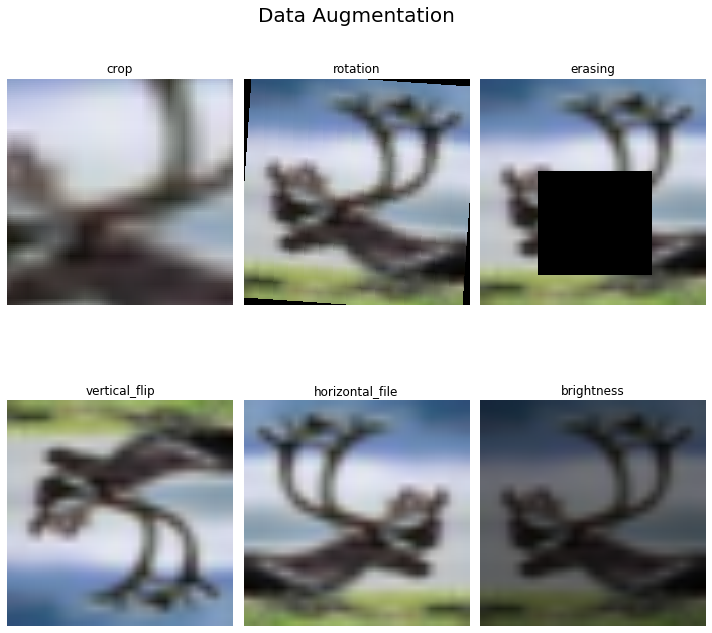

In [33]:
transform_list = [crop, rotation, erasing, vertical_flip, horizontal_file, brightness]
transform_name = ['crop', 'rotation', 'erasing', 'vertical_flip', 'horizontal_file', 'brightness']

fig, ax = plt.subplots(2, 3, figsize=(10, 10))
fig.suptitle('Data Augmentation', fontsize = 20)

for idx, transform in enumerate(transform_list):
    i, j = divmod(idx, 3)  # 2x3 형태로 배치
    ax[i, j].imshow(transform(sample_image), cmap='gray')
    ax[i, j].set_title(transform_name[idx])
    ax[i, j].axis('off')  # 축 없애기

fig.tight_layout()
plt.show()